**Task:**

Build a cohort analysis and identify a day when the most interested cohort of users came.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (15,10)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('gaData.csv', index_col=0)  # , parse_dates=['date']
df

,dimension12,date,sessions
1,0cee3912-62d7-497c-74cc-de5d4d243625,2020-08-13,1
2,1000056310.1597328139,2020-08-13,1
3,1000236379.1386241529,2020-08-13,3
4,1000283223.1597291082,2020-08-13,2
5,1000370718.1597340502,2020-08-13,1
...,...,...,...
558942,999501730.1597200043,2020-09-13,1
558943,999526137.1599995770,2020-09-13,1
558944,999608350.1600022442,2020-09-13,1
558945,999695344.1599998588,2020-09-13,1


In [3]:
df.dtypes

dimension12    object
date           object
sessions        int64
dtype: object

In [4]:
df.isna().sum()

dimension12    0
date           0
sessions       0
dtype: int64

In [5]:
df=df[df['sessions']!=0]

In [6]:
# df.drop(df.loc[558946])
df.drop(index=558946, inplace=True)

In [7]:
df=df[df['dimension12']!='function%25252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252520%252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525']
df=df[df['dimension12']!='function%252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252']
df=df[df['dimension12']!='function%25252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252520%252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525252525']

In [8]:
# df[df.dimension12.duplicated(keep=False)] - .
print('Unique users:',df.dimension12.nunique()) 
print('Users that have only one session:', len(df)-len(df[df.dimension12.duplicated(keep=False)]))

Unique users: 437465
Users that have only one session: 370426


In [10]:
len(df)

558851

In [11]:
df.sessions.value_counts()

1     467615
2      64584
3      16185
4       5514
5       2291
6       1201
7        666
8        357
9        184
10       109
11        61
12        42
13        20
14         6
15         4
16         3
18         2
19         2
24         1
17         1
20         1
22         1
26         1
Name: sessions, dtype: int64

In [13]:
# df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True )

**Session count histogram**

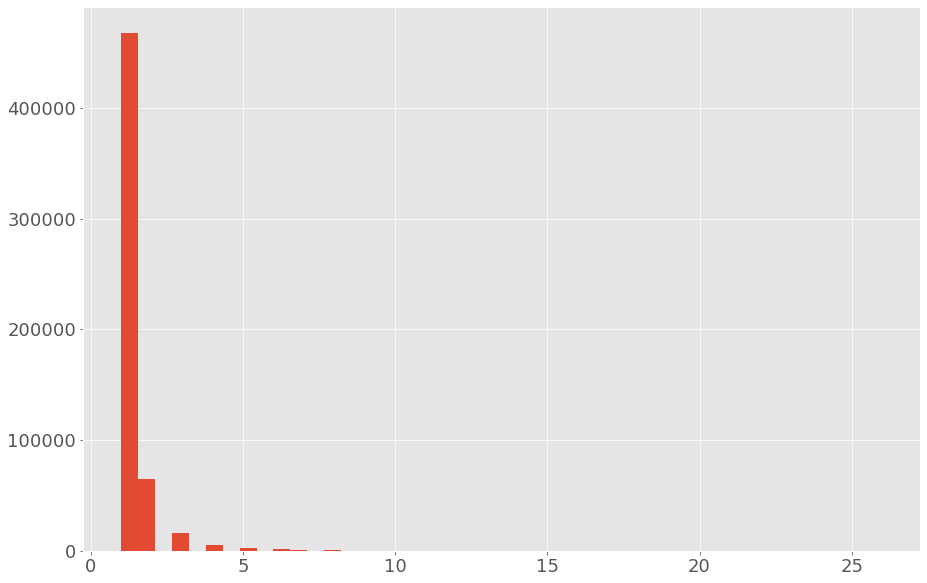

In [14]:
df['sessions'].hist(bins=45) # 

In [16]:
# df['dimension12'].nunique() # len(df.drop_duplicates(['dimension12']))

**All sessions**

Text(0.5, 1.0, 'Sessions')

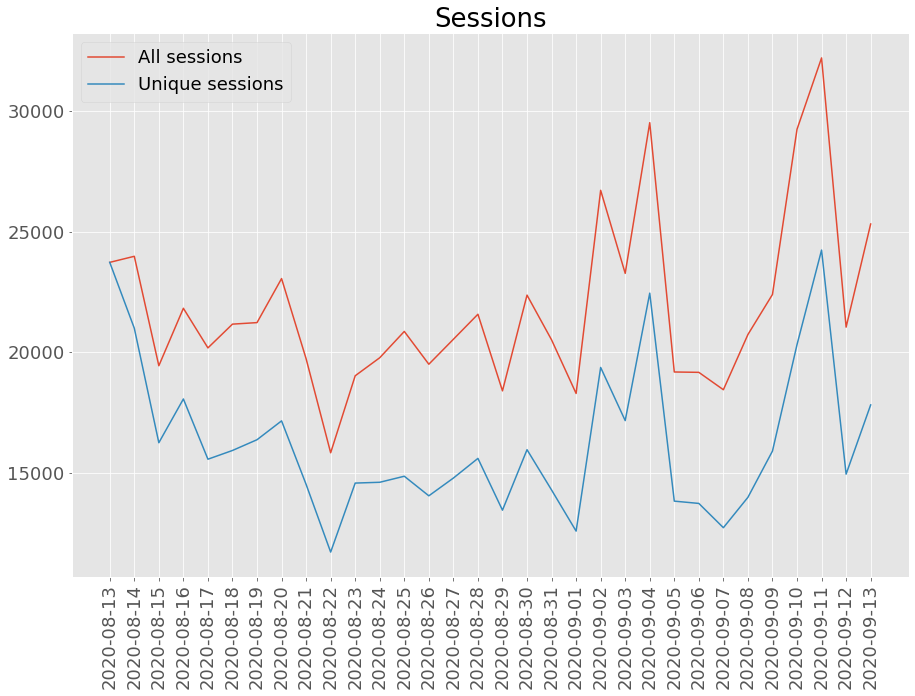

In [17]:
import numpy as np
# group by date and count how much sessions were there every day
ses=df.groupby('date').agg({'sessions': lambda x: x.sum()}).reset_index()

# [1,2,3,3]->[1,2,3] in id - unique, without repeats, 1st sessions for eash user
unises=df.drop_duplicates(['dimension12']).groupby('date').agg({'sessions': lambda x: x.sum(),
                                                               'dimension12': lambda x: x.count()}).reset_index()



ax=ses.sessions.plot(label='All sessions')
ax=unises.sessions.plot(label='Unique sessions')
ax.set_xticks(np.arange(len(ses)))
ax.set_xticklabels(ses['date'])
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('Sessions')

**Users with the repeated sessions including their 1st sessions**.

Text(0.5, 1.0, 'Returning user sessions')

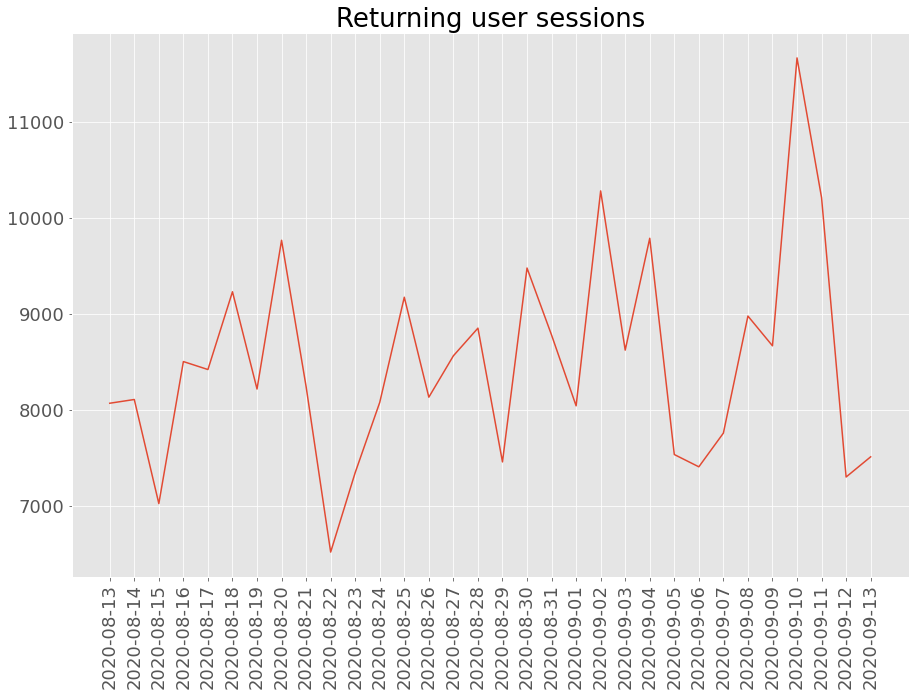

In [18]:
duplses=df[df.dimension12.duplicated(keep=False)].groupby('date').agg({'sessions': lambda x: x.sum(),
                                                               'dimension12': lambda x: x.count()}).reset_index()
ax=duplses.sessions.plot()
ax.set_xticks(np.arange(len(duplses)))
ax.set_xticklabels(duplses['date'])
plt.xticks(rotation=90)
plt.title('Returning user sessions')

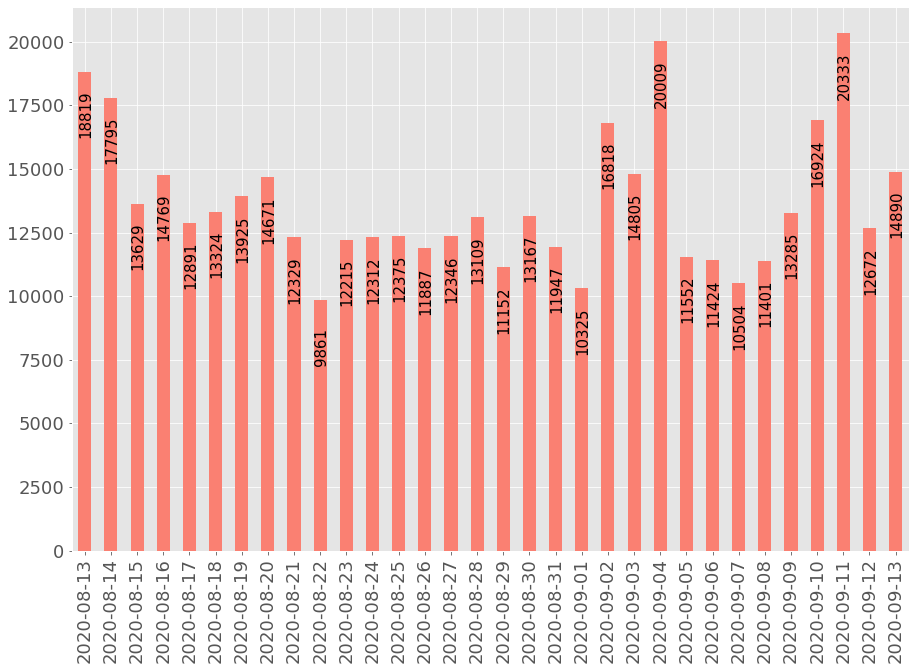

In [20]:
# unises=df.groupby('date')['dimension12'].nunique().reset_index()
ax = unises.dimension12.plot.bar(color='salmon')

ax.set_xticks(np.arange(len(unises)))
ax.set_xticklabels(unises['date'])
plt.xticks(rotation=90)


totals=[]
for i in ax.patches:
    totals.append(i.get_height())


total = sum(totals)

kk=0
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()-2500, i.get_height(), fontsize=15, color='black', rotation=90)


In [21]:
print('On average, eash new user has:', round((unises.sessions/unises.dimension12).mean(),2), 'sessions.')
print('On average,:', round(unises.dimension12.median(),2), 'unique users daily.')

On average, eash new user has: 1.19 sessions.
On average,: 13000.0 unique users daily.


**Cohorts**

For each user define, when he or she entered for the 1st time. Group by users and take the minimum date.

In [22]:
df.set_index('dimension12', inplace=True)
df.loc[:,'cohort']=df.groupby(level=0)['date'].min()

In [23]:
df

,date,sessions,cohort
dimension12,,,
0cee3912-62d7-497c-74cc-de5d4d243625,2020-08-13,1,2020-08-13
1000056310.1597328139,2020-08-13,1,2020-08-13
1000236379.1386241529,2020-08-13,3,2020-08-13
1000283223.1597291082,2020-08-13,2,2020-08-13
1000370718.1597340502,2020-08-13,1,2020-08-13
...,...,...,...
999449777.1599988988,2020-09-13,1,2020-09-13
999501730.1597200043,2020-09-13,1,2020-09-13
999526137.1599995770,2020-09-13,1,2020-09-13


In [24]:
# reset to save ids
df.reset_index(inplace=True)

In [26]:
# df.loc['1000236379.1386241529',:] # the one who has repeated sessions

In [27]:
unicoh=df.groupby(['cohort','date']).agg({'dimension12':pd.Series.nunique, 'sessions':lambda x: x.sum()}) #pd.Series.nunique
unicoh

dimension12  sessions
cohort     date                             
2020-08-13 2020-08-13        18819     23726
           2020-08-14         1776      2985
           2020-08-15          967      1656
           2020-08-16          903      1524
           2020-08-17          925      1560
...                            ...       ...
2020-09-11 2020-09-12         1007      1407
           2020-09-13          534       729
2020-09-12 2020-09-12        12672     14932
           2020-09-13          810      1228
2020-09-13 2020-09-13        14890     17806

[528 rows x 2 columns]

In [28]:
# Take each cohot and assign a value from 1 to the cohort's lenght to it.
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

In [29]:
unicoh=unicoh.groupby(level=0).apply(cohort_period)

In [30]:
unicoh

dimension12  sessions  cohort_period
cohort     date                                            
2020-08-13 2020-08-13        18819     23726              1
           2020-08-14         1776      2985              2
           2020-08-15          967      1656              3
           2020-08-16          903      1524              4
           2020-08-17          925      1560              5
...                            ...       ...            ...
2020-09-11 2020-09-12         1007      1407              2
           2020-09-13          534       729              3
2020-09-12 2020-09-12        12672     14932              1
           2020-09-13          810      1228              2
2020-09-13 2020-09-13        14890     17806              1

[528 rows x 3 columns]

In [31]:
# unicoh.unstack('date')['sessions'].plot.area()
unicoh.reset_index(inplace=True)

In [32]:
unicoh

,cohort,date,dimension12,sessions,cohort_period
0,2020-08-13,2020-08-13,18819,23726,1
1,2020-08-13,2020-08-14,1776,2985,2
2,2020-08-13,2020-08-15,967,1656,3
3,2020-08-13,2020-08-16,903,1524,4
4,2020-08-13,2020-08-17,925,1560,5
...,...,...,...,...,...
523,2020-09-11,2020-09-12,1007,1407,2
524,2020-09-11,2020-09-13,534,729,3
525,2020-09-12,2020-09-12,12672,14932,1
526,2020-09-12,2020-09-13,810,1228,2


In [33]:
cohorts = unicoh.copy()

cohorts.set_index(['cohort', 'cohort_period'], inplace=True)

cohort_group_size = cohorts['sessions'].groupby(level=0).first() # sessions or dimensions = different plots
cohort_group_size.head(20)

cohort
2020-08-13    23726
2020-08-14    20993
2020-08-15    16236
2020-08-16    18053
2020-08-17    15552
2020-08-18    15915
2020-08-19    16361
2020-08-20    17144
2020-08-21    14506
2020-08-22    11695
2020-08-23    14561
2020-08-24    14594
2020-08-25    14845
2020-08-26    14032
2020-08-27    14769
2020-08-28    15586
2020-08-29    13435
2020-08-30    15947
2020-08-31    14274
2020-09-01    12566
Name: sessions, dtype: int64

In [34]:
# Take the number of users and divide each day by the values from the table above on the same day. 
# As a result, we look at how the percentage falls.
# Because the table above is the maximum (the number of users in each group)
user_retention = cohorts['sessions'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

cohort,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-22,...,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13
cohort_period,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.125811,0.073405,0.079145,0.087575,0.091242,0.078040,0.082758,0.071337,0.061423,0.077212,...,0.048779,0.080154,0.069627,0.091517,0.084252,0.087786,0.088770,0.058052,0.082239,NaN
3,0.069797,0.045587,0.043360,0.050739,0.049254,0.053220,0.037039,0.026365,0.030746,0.038478,...,0.025080,0.030483,0.034485,0.037142,0.046457,0.039834,0.028851,0.030078,NaN,NaN
4,0.064233,0.037012,0.030981,0.031463,0.035044,0.032548,0.021637,0.021932,0.030953,0.026507,...,0.021249,0.026066,0.023622,0.028958,0.024696,0.023095,0.028507,NaN,NaN,NaN
5,0.065751,0.031820,0.026915,0.032128,0.027971,0.019101,0.021209,0.022165,0.028264,0.022232,...,0.015770,0.017160,0.020779,0.023371,0.016178,0.016424,NaN,NaN,NaN,NaN
6,0.073337,0.029200,0.028763,0.024816,0.018711,0.018787,0.019375,0.023798,0.020130,0.019667,...,0.013542,0.017160,0.013196,0.013299,0.018826,NaN,NaN,NaN,NaN,NaN
7,0.052137,0.028152,0.021003,0.019387,0.018004,0.020861,0.019314,0.016741,0.019923,0.016674,...,0.016082,0.014409,0.014290,0.014558,NaN,NaN,NaN,NaN,NaN,NaN
8,0.064275,0.024865,0.019217,0.018667,0.019419,0.023940,0.015708,0.020240,0.016752,0.015135,...,0.010914,0.015060,0.015456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.047416,0.017053,0.018169,0.014070,0.020512,0.016400,0.015830,0.020999,0.013236,0.016417,...,0.006281,0.012454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
user_retention=user_retention[1:]

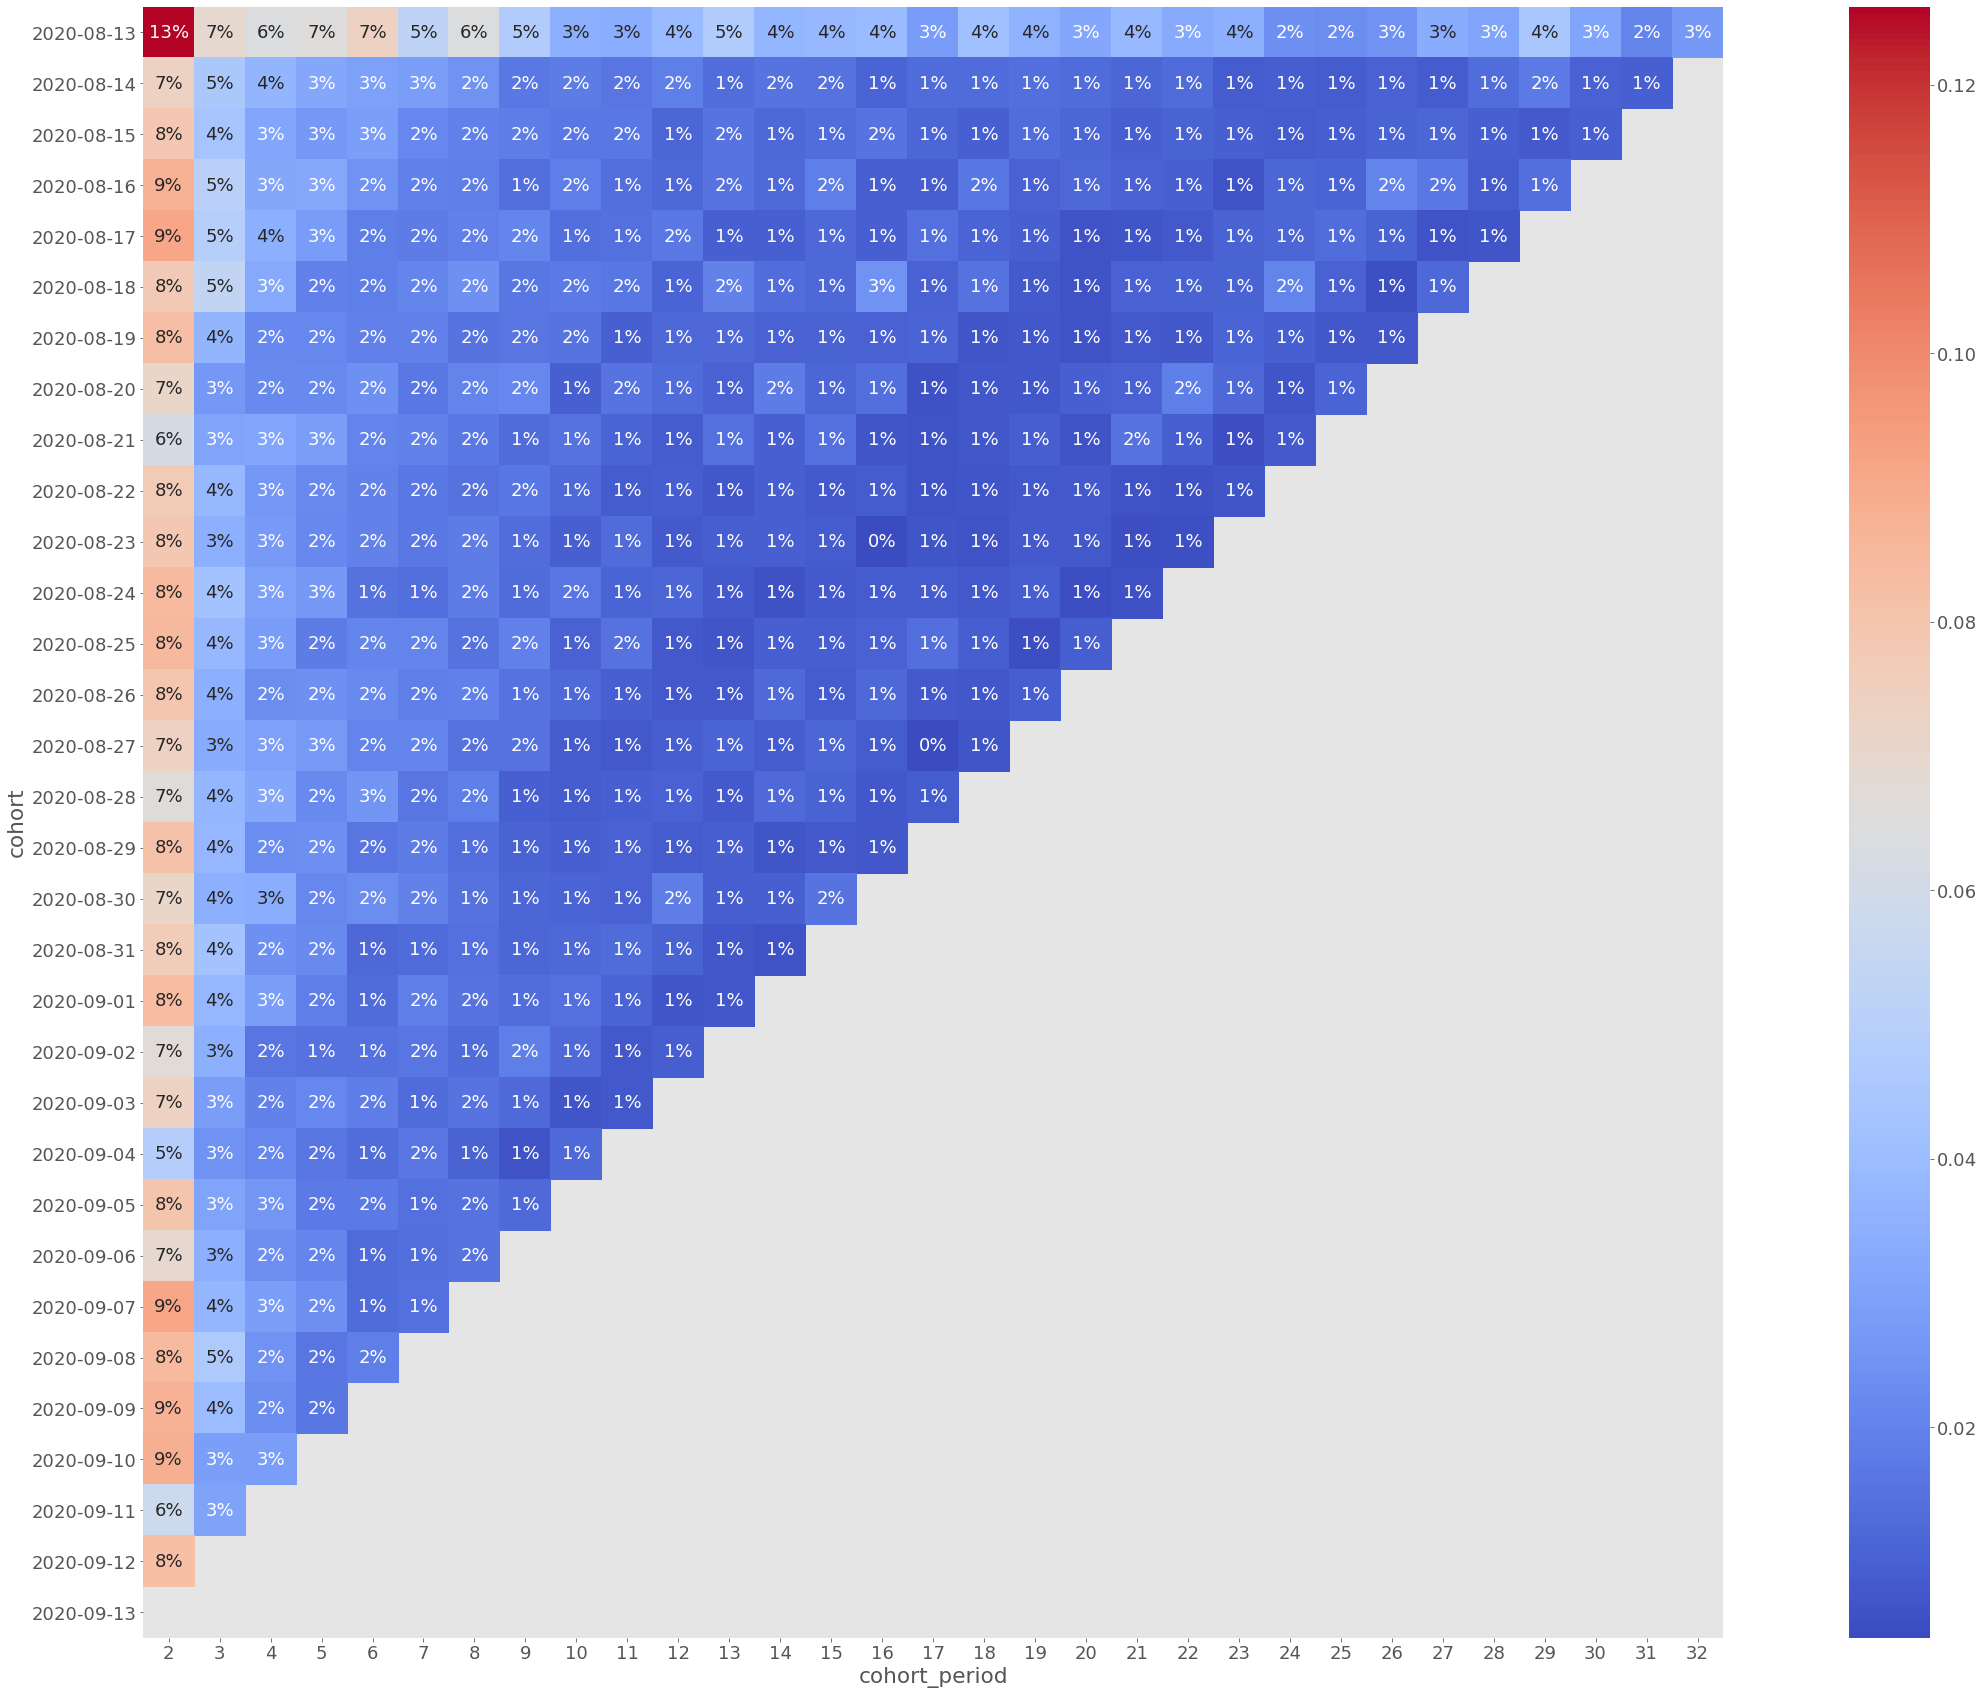

In [37]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(45,30))

# plt.title('Cohort, users quantity')
sns_plot=sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%', ax=ax, square=True,cmap='coolwarm');
plt.yticks(rotation=0)
plt.show()

sns_plot.figure.savefig("output.png")

In [38]:
df

,dimension12,date,sessions,cohort
0,0cee3912-62d7-497c-74cc-de5d4d243625,2020-08-13,1,2020-08-13
1,1000056310.1597328139,2020-08-13,1,2020-08-13
2,1000236379.1386241529,2020-08-13,3,2020-08-13
3,1000283223.1597291082,2020-08-13,2,2020-08-13
4,1000370718.1597340502,2020-08-13,1,2020-08-13
...,...,...,...,...
558846,999449777.1599988988,2020-09-13,1,2020-09-13
558847,999501730.1597200043,2020-09-13,1,2020-09-13
558848,999526137.1599995770,2020-09-13,1,2020-09-13
558849,999608350.1600022442,2020-09-13,1,2020-09-13


**13 Aug Cohort, the most interested in content**

Period of the greatest activity of this user group is 9 days. 
Other groups lose their interest on the 4th day.

In [39]:
coh13=df[df['cohort']=='2020-08-13']
coh13

,dimension12,date,sessions,cohort
0,0cee3912-62d7-497c-74cc-de5d4d243625,2020-08-13,1,2020-08-13
1,1000056310.1597328139,2020-08-13,1,2020-08-13
2,1000236379.1386241529,2020-08-13,3,2020-08-13
3,1000283223.1597291082,2020-08-13,2,2020-08-13
4,1000370718.1597340502,2020-08-13,1,2020-08-13
...,...,...,...,...
558684,984216717.1595490050,2020-09-13,2,2020-08-13
558691,985127630.1560400822,2020-09-13,1,2020-08-13
558695,985525261.1594971317,2020-09-13,1,2020-08-13
558734,988444270.1594521929,2020-09-13,1,2020-08-13


In [40]:
coh13['dimension12'].nunique()

18819

In [41]:
coh13.set_index('dimension12', inplace=True)
coh13.loc[:,'last']=coh13.groupby('dimension12')['date'].max()

In [42]:
coh13

,date,sessions,cohort,last
dimension12,,,,
0cee3912-62d7-497c-74cc-de5d4d243625,2020-08-13,1,2020-08-13,2020-09-07
1000056310.1597328139,2020-08-13,1,2020-08-13,2020-08-13
1000236379.1386241529,2020-08-13,3,2020-08-13,2020-09-10
1000283223.1597291082,2020-08-13,2,2020-08-13,2020-08-20
1000370718.1597340502,2020-08-13,1,2020-08-13,2020-08-15
...,...,...,...,...
984216717.1595490050,2020-09-13,2,2020-08-13,2020-09-13
985127630.1560400822,2020-09-13,1,2020-08-13,2020-09-13
985525261.1594971317,2020-09-13,1,2020-08-13,2020-09-13


In [43]:
coh13.reset_index()

,dimension12,date,sessions,cohort,last
0,0cee3912-62d7-497c-74cc-de5d4d243625,2020-08-13,1,2020-08-13,2020-09-07
1,1000056310.1597328139,2020-08-13,1,2020-08-13,2020-08-13
2,1000236379.1386241529,2020-08-13,3,2020-08-13,2020-09-10
3,1000283223.1597291082,2020-08-13,2,2020-08-13,2020-08-20
4,1000370718.1597340502,2020-08-13,1,2020-08-13,2020-08-15
...,...,...,...,...,...
36302,984216717.1595490050,2020-09-13,2,2020-08-13,2020-09-13
36303,985127630.1560400822,2020-09-13,1,2020-08-13,2020-09-13
36304,985525261.1594971317,2020-09-13,1,2020-08-13,2020-09-13
36305,988444270.1594521929,2020-09-13,1,2020-08-13,2020-09-13


In [44]:
coh13['cohort']=pd.to_datetime(coh13['cohort'],infer_datetime_format = True)
coh13['last']=pd.to_datetime(coh13['last'],infer_datetime_format = True)

In [45]:
coh13['duration']=coh13['last']-coh13['cohort']

In [46]:
coh13.reset_index(inplace=True)

In [47]:
durcoh13=pd.DataFrame(coh13.groupby('duration', as_index=False).agg({'dimension12': pd.Series.nunique}))

In [48]:
df[df['cohort']=='2020-08-13']['dimension12'].nunique()

18819

In [49]:
durcoh13

,duration,dimension12
0,0 days,13371
1,1 days,719
2,2 days,310
3,3 days,262
4,4 days,250
5,5 days,248
6,6 days,180
7,7 days,250
8,8 days,152
9,9 days,93


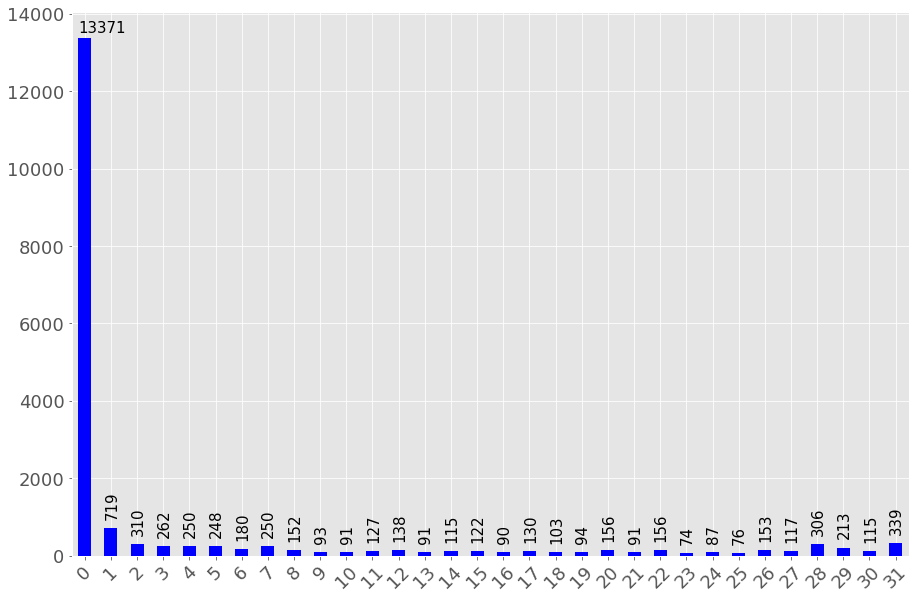

In [50]:
fig, ax = plt.subplots()

durcoh13['dimension12'].plot.bar(color='b')
# ax.set_xticks(x)
# ax.set_xticklabels(x)
plt.xticks(rotation=45)

totals=[]
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

kk=0
for i in ax.patches:
    if kk ==0:
        ax.text(i.get_x(), i.get_height()+150, i.get_height(), fontsize=15, color='black')
    else:
        ax.text(i.get_x(), i.get_height()+300, i.get_height(), fontsize=15, color='black', rotation=90)
    kk=9